<a href="https://colab.research.google.com/github/rahulranjan74/ML_Projects_74/blob/main/Excavate_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('superconductivity_train_data.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [ ]:
corr_matrix = df.corr()
corr_matrix = corr_matrix['critical_temp'].sort_values(ascending=False)
df=df.dropna()
# Select the top variables with the strongest correlation with Tc
top_vars = corr_matrix[1:26].index.tolist()
X = df[top_vars]
y = df['critical_temp']
y=y.astype('int')
print(top_vars)

['wtd_std_ThermalConductivity', 'range_ThermalConductivity', 'range_atomic_radius', 'std_ThermalConductivity', 'wtd_entropy_atomic_mass', 'wtd_entropy_atomic_radius', 'number_of_elements', 'range_fie', 'wtd_std_atomic_radius', 'entropy_Valence', 'wtd_entropy_Valence', 'wtd_std_fie', 'entropy_fie', 'wtd_entropy_FusionHeat', 'std_atomic_radius', 'entropy_atomic_radius', 'entropy_FusionHeat', 'entropy_atomic_mass', 'std_fie', 'range_atomic_mass', 'wtd_range_ThermalConductivity', 'entropy_Density', 'entropy_ElectronAffinity', 'wtd_entropy_Density', 'wtd_mean_fie']


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

# Define the hyperparameters to be tuned for each model
params = {
    'Linear Regression': {},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'SVR': {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}
}

# Train and evaluate each model using GridSearchCV
best_model = None
best_score = -np.inf
best_predictions = None

for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    y_pred = grid_search.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{model_name} R2 score: {score:.3f}")
    
    if score > best_score:
        best_score = score
        best_model = grid_search.best_estimator_
        best_predictions = y_pred

print("\nBest model:", type(best_model).__name__)
print("Best hyperparameters:", best_model.get_params())

Linear Regression R2 score: 0.674
Random Forest R2 score: 0.927
SVR R2 score: 0.797

Best model: RandomForestRegressor
Best hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


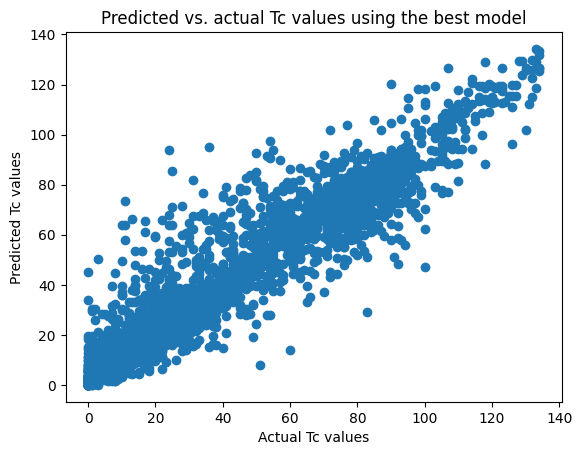

In [ ]:
plt.scatter(y_test, best_predictions)
plt.xlabel("Actual Tc values")
plt.ylabel("Predicted Tc values")
plt.title("Predicted vs. actual Tc values using the best model")
plt.show()

In [ ]:
mse = mean_squared_error(y_test, best_predictions)
print("MSE using the best model:", mse)

MSE using the best model: 84.42479854168914


In [ ]:
r2_score = best_model.score(X_test, y_test)
print("R2 score of the best model:", r2_score)

R2 score of the best model: 0.9270075935812352
